In [1]:
import numpy as np
import pandas as pd
import sys

get_ipython().system('pip install prophet') #Using get_ipython().system instead of %pip for wider compatibility.

from prophet import Prophet
import matplotlib.pyplot as plt
import math as math

get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# Load the data
train = pd.read_csv("train_1.csv", on_bad_lines='skip') 
keys = pd.read_csv("key_1.csv", on_bad_lines='skip', engine="python")
ss = pd.read_csv("sample_submission_1.csv", on_bad_lines='skip') 

In [3]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
# Check the data
print("Check the number of records")
print("Number of records: ", train.shape[0], "\n")

print("Null analysis")
empty_sample = train[train.isnull().any(axis=1)]
print("Number of records contain 1+ null: ", empty_sample.shape[0], "\n")

Check the number of records
Number of records:  145063 

Null analysis
Number of records contain 1+ null:  27786 



In [5]:
empty_sample.iloc[np.r_[0:10, len(empty_sample)-10:len(empty_sample)]]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
10,ASTRO_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,11.0,38.0,85.0,79.0,30.0,14.0,10.0,38.0,12.0,51.0
13,AlphaGo_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,14.0,17.0,19.0,56.0,21.0,13.0,21.0,11.0
19,B-PROJECT_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,26.0,10.0,5.0,5.0,11.0,10.0,4.0,8.0,6.0
24,BLACK_PINK_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,56.0,39.0,65.0,78.0,143.0,96.0,63.0,28.0,75.0
27,Beautiful_Mind_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,8.0,6.0,7.0,2.0,11.0,11.0,29.0,12.0,14.0
37,Dear_My_Friends_zh.wikipedia.org_all-access_sp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,12.0,8.0,12.0,3.0,10.0,21.0,6.0,8.0,9.0
38,Doctors_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,19.0,175.0,17.0,21.0,30.0,65.0,70.0,18.0,68.0
48,Fantastic_Duo_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,16.0,15.0,11.0,10.0,7.0,12.0,9.0,8.0,10.0


## Data visualization

C:\Users\ayush\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32043 (\N{CJK UNIFIED IDEOGRAPH-7D2B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31291 (\N{CJK UNIFIED IDEOGRAPH-7A3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22485 (\N{CJK UNIFIED IDEOGRAPH-57D5}) missing from font(s) DejaVu San

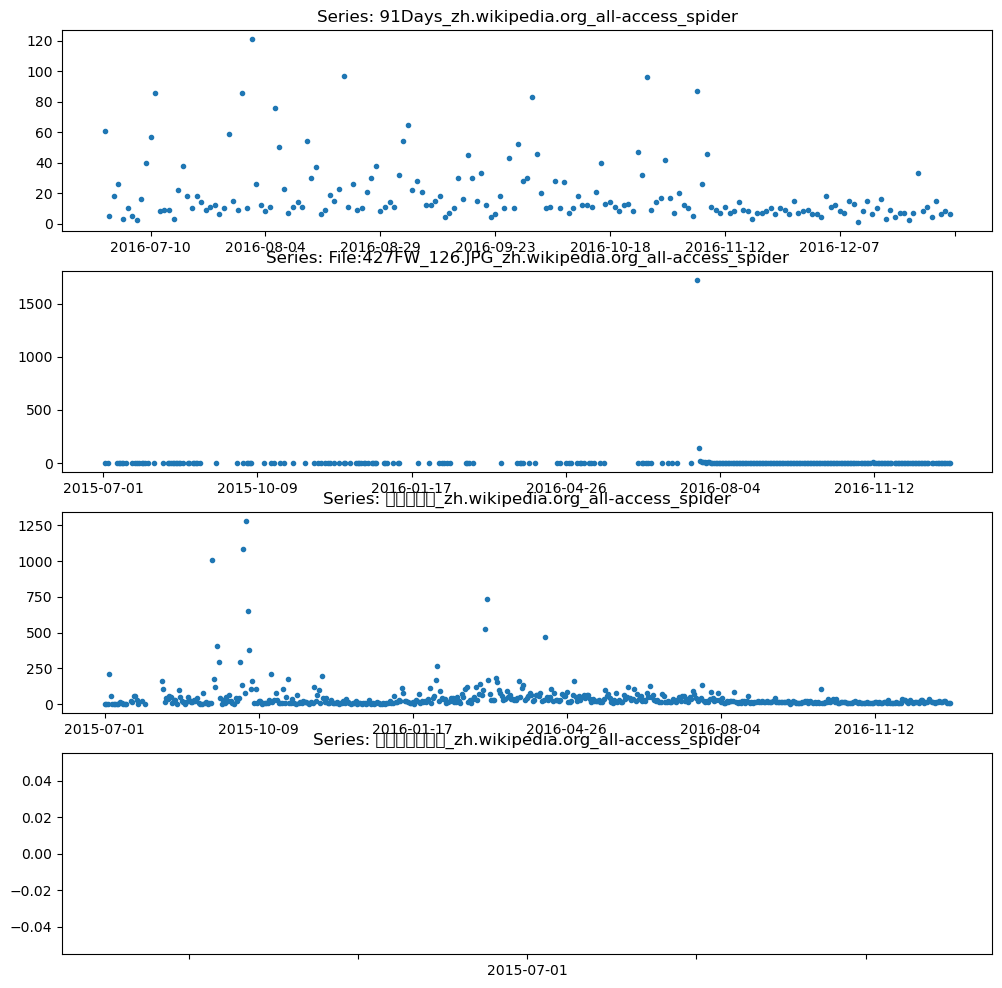

In [7]:
# plot 3 the time series
import matplotlib.font_manager as fm
def plot_time_series(df, row_num, start_col =1, ax=None):
    if ax is None:
            fig = plt.figure(facecolor='w', figsize=(10, 6))
            ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()
        
    series_title = df.iloc[row_num, 0]
    sample_series = df.iloc[row_num, start_col:]
    sample_series.plot(style=".", ax=ax)
    ax.set_title("Series: %s" % series_title)

fig, axs  = plt.subplots(4,1,figsize=(12,12))
plot_time_series(empty_sample, 1, ax=axs[0])
plot_time_series(empty_sample, 10, ax=axs[1])
plot_time_series(empty_sample, 100, ax=axs[2])
plot_time_series(empty_sample, 1005, ax=axs[3])

# plt.tight_layout()
plt.show()

In [8]:
# series with all NaN
empty_sample.iloc[1000:1010]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
4295,李宏毅_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4296,迪玛希·库达依别列根_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,7日羅曼史_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,漫漫回家路_(2016年電影)_zh.wikipedia.org_all-access_sp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4299,為了與你相遇_(電影)_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4300,小林家的龍女僕_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4301,曹晏豪_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4302,徐鈞浩_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4303,生化危機7_惡靈古堡_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4304,A_LIFE～深愛的人～_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  Data transformation and helper functions
## A. Article names and metadata

In [10]:
import re

def breakdown_topic(str):
    m = re.search('(.*)\_(.*).wikipedia.org\_(.*)\_(.*)', str)
    if m is not None:
        return m.group(1), m.group(2), m.group(3), m.group(4)
    else:
        return "", "", "", ""

print(breakdown_topic("Рудова,_Наталья_Александровна_ru.wikipedia.org_all-access_spider"))
print(breakdown_topic("台灣災難列表_zh.wikipedia.org_all-access_spider"))
print(breakdown_topic("File:Memphis_Blues_Tour_2010.jpg_commons.wikimedia.org_mobile-web_all-agents"))

('Рудова,_Наталья_Александровна', 'ru', 'all-access', 'spider')
('台灣災難列表', 'zh', 'all-access', 'spider')
('', '', '', '')


<>:4: SyntaxWarning: invalid escape sequence '\_'
<>:4: SyntaxWarning: invalid escape sequence '\_'
C:\Users\ayush\AppData\Local\Temp\ipykernel_3216\147810254.py:4: SyntaxWarning: invalid escape sequence '\_'
  m = re.search('(.*)\_(.*).wikipedia.org\_(.*)\_(.*)', str)


In [11]:
page_details = train.Page.str.extract(r'(?P<topic>.*)\_(?P<lang>.*).wikipedia.org\_(?P<access>.*)\_(?P<type>.*)')

page_details[0:10]

,topic,lang,access,type
0,2NE1,zh,all-access,spider
1,2PM,zh,all-access,spider
2,3C,zh,all-access,spider
3,4minute,zh,all-access,spider
4,52_Hz_I_Love_You,zh,all-access,spider
5,5566,zh,all-access,spider
6,91Days,zh,all-access,spider
7,A'N'D,zh,all-access,spider
8,AKB48,zh,all-access,spider
9,ASCII,zh,all-access,spider


In [12]:
unique_topic = page_details["topic"].unique()
print(unique_topic)
print("Number of distinct topics: ", unique_topic.shape[0])

['2NE1' '2PM' '3C' ... 'Eine_Reihe_betrüblicher_Ereignisse_(Fernsehserie)'
 'ジャック・リーチャー' 'マイク眞木']
Number of distinct topics:  42213


In [13]:
fig, axs  = plt.subplots(3,1,figsize=(12,12))

page_details["lang"].value_counts().sort_index().plot.bar(ax=axs[0])
axs[0].set_title('Language - distribution')

page_details["access"].value_counts().sort_index().plot.bar(ax=axs[1])
axs[1].set_title('Access - distribution')

page_details["type"].value_counts().sort_index().plot.bar(ax=axs[2])
axs[2].set_title('Type - distribution')

plt.tight_layout()

## B. Split into train and validation dataset

In [15]:
# Generate train and validate dataset
train_df = pd.concat([page_details, train], axis=1)

def get_train_validate_set(train_df, test_percent):
    train_end = math.floor((train_df.shape[1]-5) * (1-test_percent))
    train_ds = train_df.iloc[:, np.r_[0,1,2,3,4,5:train_end]]
    test_ds = train_df.iloc[:, np.r_[0,1,2,3,4,train_end:train_df.shape[1]]]
    
    return train_ds, test_ds

X_train, y_train = get_train_validate_set(train_df, 0.1)

print("The training set sample:")
print(X_train[0:10])
print("The validation set sample:")
print(y_train[0:10])

The training set sample:
              topic lang      access    type  \
0              2NE1   zh  all-access  spider   
1               2PM   zh  all-access  spider   
2                3C   zh  all-access  spider   
3           4minute   zh  all-access  spider   
4  52_Hz_I_Love_You   zh  all-access  spider   
5              5566   zh  all-access  spider   
6            91Days   zh  all-access  spider   
7             A'N'D   zh  all-access  spider   
8             AKB48   zh  all-access  spider   
9             ASCII   zh  all-access  spider   

                                                Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-acces

# Forecast methods


In [17]:
def extract_series(df, row_num, start_idx):
    y = df.iloc[row_num, start_idx:]
    df = pd.DataFrame({ 'ds': y.index, 'y': y.values})
    return df

## A. SMAPE

In [19]:
def smape(predict, actual, debug=False):
    '''
    predict and actual is a panda series.
    In this implementation I will skip all the datapoint with actual is null
    '''
    actual = actual.fillna(0)
    data = pd.concat([predict, actual], axis=1, keys=['predict', 'actual'])
    data = data[data.actual.notnull()]
    if debug:
        print('debug', data)
    
    evals = abs(data.predict - data.actual) * 1.0 / (abs(data.predict) + abs(data.actual)) * 2
    evals[evals.isnull()] = 0
    #print(np.sum(evals), len(data), np.sum(evals) * 1.0 / len(data))
    
    result = np.sum(evals) / len(data)
    
    return result

# create testing series
testing_series_1 = X_train.iloc[0, 5:494]
testing_series_2 = X_train.iloc[0, 5:494].shift(-1)
testing_series_3 = X_train.iloc[1, 5:494]
testing_series_4 = pd.Series([0,0,0,0])

In [20]:
random_series_1 = pd.Series(np.repeat(3, 500))
random_series_2 = pd.Series(np.random.normal(3, 1, 500))
random_series_3 = pd.Series(np.random.normal(500, 20, 500))
random_series_4 = pd.Series(np.repeat(500, 500))

# testing 1 same series
print("\nSMAPE score to predict a constant array of 3")
print("Score (same series): %.3f" % smape(random_series_1, random_series_1))
print("Score (same series - 1) %.3f" % smape(random_series_1, random_series_1-1))
print("Score (same series + 1) %.3f" % smape(random_series_1, random_series_1+1))

# testing 2 same series shift by one
print("\nSMAPE score to predict a array of normal distribution around 3")
print("Score (random vs mean) %.3f" % smape(random_series_2, random_series_1))
print("Score (random vs mean-1) %.3f" % smape(random_series_2, random_series_2-1))
print("Score (random vs mean+1) %.3f" % smape(random_series_2, random_series_2+1))
print("Score (random vs mean*0.9) %.3f" % smape(random_series_2, random_series_2*0.9))
print("Score (random vs mean*1.1) %.3f" % smape(random_series_2, random_series_2*1.1))

# testing 3 totally different series
print("\nSMAPE score to predict a array of normal distribution around 500")
print("Score (random vs mean) %.3f" % smape(random_series_3, random_series_4))
print("Score (random vs mean-20) %.3f" % smape(random_series_3, random_series_3-20))
print("Score (random vs mean+20) %.3f" % smape(random_series_3, random_series_3+20))
print("Score (random vs mean*0.9) %.3f" % smape(random_series_3, random_series_3*0.9))
print("Score (random vs mean*1.1) %.3f" % smape(random_series_3, random_series_3*1.1))



SMAPE score to predict a constant array of 3
Score (same series): 0.000
Score (same series - 1) 0.400
Score (same series + 1) 0.286

SMAPE score to predict a array of normal distribution around 3
Score (random vs mean) 0.283
Score (random vs mean-1) 0.495
Score (random vs mean+1) 0.313
Score (random vs mean*0.9) 0.105
Score (random vs mean*1.1) 0.095

SMAPE score to predict a array of normal distribution around 500
Score (random vs mean) 0.031
Score (random vs mean-20) 0.041
Score (random vs mean+20) 0.039
Score (random vs mean*0.9) 0.105
Score (random vs mean*1.1) 0.095


In [21]:
y_true_1 = pd.Series(np.random.normal(1, 1, 500))
y_true_2 = pd.Series(np.random.normal(2, 1, 500))
y_true_3 = pd.Series(np.random.normal(3, 1, 500))
y_pred = pd.Series(np.ones(500))
x = np.linspace(0,10,1000)
res_1 = list([smape(y_true_1, i * y_pred) for i in x])
res_2 = list([smape(y_true_2, i * y_pred) for i in x])
res_3 = list([smape(y_true_3, i * y_pred) for i in x])
plt.plot(x, res_1, color='b')
plt.plot(x, res_2, color='r')
plt.plot(x, res_3, color='g')
plt.axvline(x=1, color='k')
plt.axvline(x=2, color='k')
plt.axvline(x=3, color='k')

## B. Simple median model

In [23]:
def plot_prediction_and_actual_2(train, forecast, actual, xlim=None, ylim=None, figSize=None, title=None):
    fig, ax  = plt.subplots(1,1,figsize=figSize)
    ax.plot(pd.to_datetime(train.index), train.values, 'k.')
    ax.plot(pd.to_datetime(actual.index), actual.values, 'r.')
    ax.plot(pd.to_datetime(forecast.index), forecast.values, 'b-')
    ax.set_title(title)
    plt.show()

In [24]:
def median_model(df_train, df_actual, p, review=False, figSize=(12, 4)):
    
    def nanmedian_zero(a):
        return np.nan_to_num(np.nanmedian(a))
    
    df_train['y'] = pd.to_numeric(df_train['y'])#.convert_objects(convert_numeric=True)
    df_actual['y'] = pd.to_numeric(df_actual['y'])#.convert_objects(convert_numeric=True)
    visits = nanmedian_zero(df_train['y'].values[-p:])
    train_series = df_train['y']
    train_series.index = df_train.ds
    
    idx = np.arange( p) + np.arange(len(df_train)- p+1)[:,None]
    b = [row[row>=0] for row in df_train.y.values[idx]]
    pre_forecast = pd.Series(np.append(([float('nan')] * (p-1)), list(map(nanmedian_zero,b))))
    pre_forecast.index = df_train.ds
    
    forecast_series = pd.Series(np.repeat(visits, len(df_actual)))
    forecast_series.index = df_actual.ds
    
    forecast_series = pd.concat([pre_forecast, forecast_series])
    
    actual_series = df_actual.y
    actual_series.index = df_actual.ds
    
    if(review):
        plot_prediction_and_actual_2(train_series, forecast_series, actual_series, figSize=figSize, title='Median model')
    
    return smape(forecast_series, actual_series)

                                    Page  2015-07-01  2015-07-02  2015-07-03  \
2  3C_zh.wikipedia.org_all-access_spider         1.0         0.0         1.0   

   2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  2015-07-09  \
2         1.0         0.0         4.0         0.0         3.0         4.0   

   ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  2016-12-26  \
2  ...         3.0         1.0         1.0         7.0         4.0   

   2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
2         4.0         6.0         3.0         4.0        17.0  

[1 rows x 551 columns]


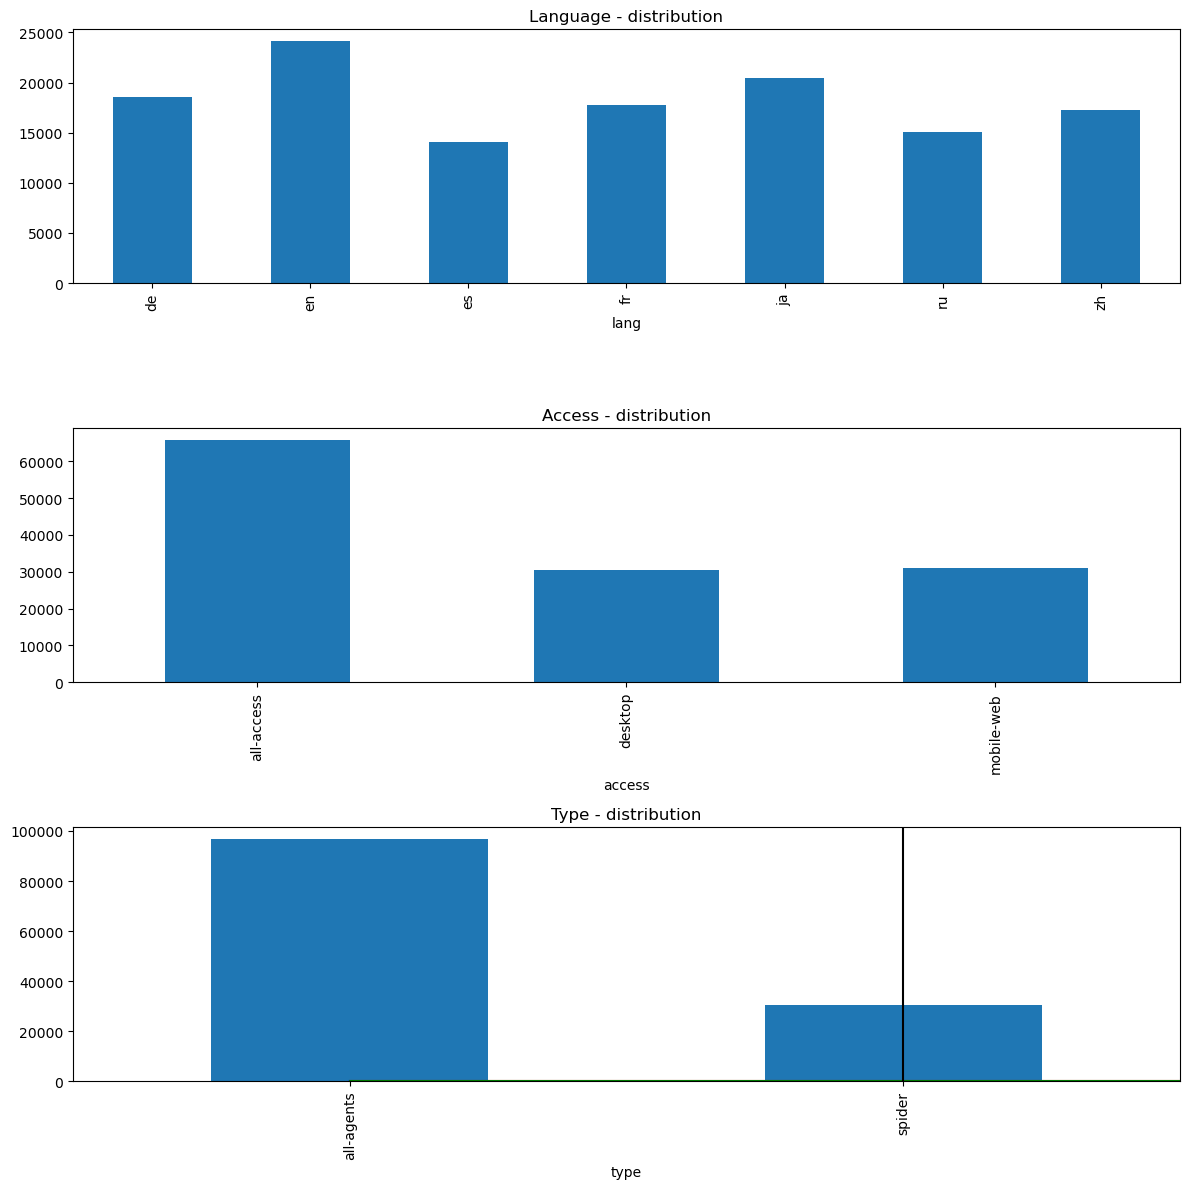

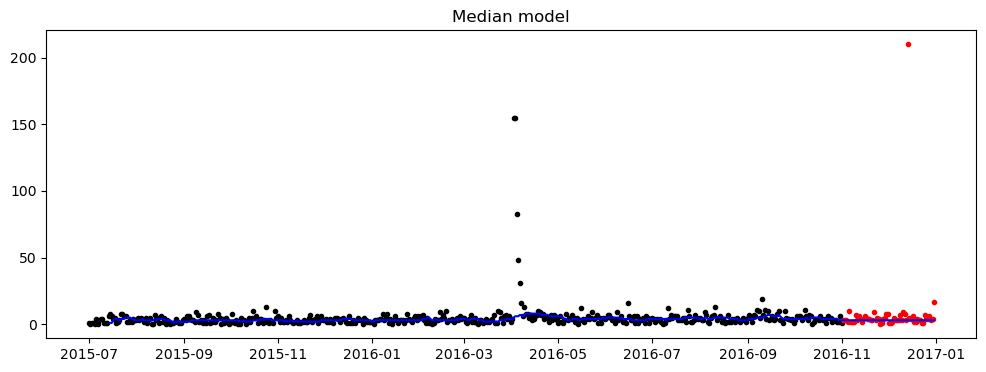

The SMAPE score is : 0.50096


In [25]:
# This is to demo the median model
print(train.iloc[[2]])

df_train = extract_series(X_train, 2, 5)
df_actual = extract_series(y_train, 2, 5)
lang = X_train.iloc[2, 1]
score = median_model(df_train.copy(), df_actual.copy(), 15, review=True)
print("The SMAPE score is : %.5f" % score)

## C. Median model - weekday, weekend and holiday

In [27]:
# holiday variable
#holiday_en = ['2015-01-01', '2015-01-19', '2015-04-03', '2015-05-04', '2015-05-25', '2015-07-01', '2015-07-03', '2015-09-07', '2015-11-26', '2015-11-27', '2015-12-25', '2015-12-26', '2015-12-28', '2016-01-01', '2016-01-18', '2016-03-25', '2016-05-02', '2016-05-30', '2016-07-01', '2016-07-04', '2016-09-05', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26', '2016-12-27', '2017-01-01', '2017-01-02', '2017-01-16', '2017-04-14', '2017-05-01', '2017-05-29', '2017-07-01', '2017-07-03', '2017-07-04', '2017-09-04', '2017-11-10', '2017-11-23', '2017-12-25', '2017-12-26']

holiday_en_us = ['2015-01-01', '2015-01-19', '2015-05-25', '2015-07-03', '2015-09-07', '2015-11-26', '2015-11-27', '2015-12-25', '2016-01-01', '2016-01-18', '2016-05-30', '2016-07-04', '2016-09-05', '2016-11-11', '2016-11-24', '2016-12-26', '2017-01-01', '2017-01-02', '2017-01-16', '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-10', '2017-11-23', '2017-12-25']
holiday_en_uk = ['2015-01-01', '2015-04-03', '2015-05-04', '2015-05-25', '2015-12-25', '2015-12-26', '2015-12-28', '2016-01-01', '2016-03-25', '2016-05-02', '2016-05-30', '2016-12-26', '2016-12-27', '2017-01-01', '2017-04-14', '2017-05-01', '2017-05-29', '2017-12-25', '2017-12-26']
holiday_en_canada = ['2015-01-01', '2015-07-01', '2015-09-07', '2015-12-25', '2016-01-01', '2016-07-01', '2016-09-05', '2016-12-25', '2017-01-01', '2017-07-01', '2017-07-03', '2017-09-04', '2017-12-25']

holiday_ru_russia = ['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-02-23', '2015-03-09', '2015-05-01', '2015-05-04', '2015-05-09', '2015-05-11', '2015-06-12', '2015-11-04', '2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07', '2016-02-22', '2016-02-23', '2016-03-08', '2016-05-01', '2016-05-09', '2016-06-12', '2016-06-13', '2016-11-04', '2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07', '2017-02-23', '2017-02-24', '2017-03-08', '2017-05-01', '2017-05-08', '2017-05-09', '2017-06-12', '2017-11-04', '2017-11-06']
#holiday_es = ['2015-01-01', '2015-01-06', '2015-01-12', '2015-02-02', '2015-03-16', '2015-03-23', '2015-04-02', '2015-04-03', '2015-05-01', '2015-05-18', '2015-06-08', '2015-06-15', '2015-06-29', '2015-07-20', '2015-08-07', '2015-08-17', '2015-09-16', '2015-10-12', '2015-11-01', '2015-11-02', '2015-11-16', '2015-12-06', '2015-12-08', '2015-12-12', '2015-12-25', '2016-01-01', '2016-01-06', '2016-01-11', '2016-02-01', '2016-03-21', '2016-03-24', '2016-03-25', '2016-05-01', '2016-05-09', '2016-05-30', '2016-06-06', '2016-07-04', '2016-07-20', '2016-08-07', '2016-08-15', '2016-09-16', '2016-10-12', '2016-10-17', '2016-11-01', '2016-11-02', '2016-11-07', '2016-11-14', '2016-11-21', '2016-12-06', '2016-12-08', '2016-12-12', '2016-12-25', '2016-12-26', '2017-01-01', '2017-01-02', '2017-01-06', '2017-01-09', '2017-02-06', '2017-03-20', '2017-04-13', '2017-04-14', '2017-05-01', '2017-05-29', '2017-06-19', '2017-06-26', '2017-07-03', '2017-07-20', '2017-08-07', '2017-08-15', '2017-09-16', '2017-10-12', '2017-10-16', '2017-11-01', '2017-11-02', '2017-11-06', '2017-11-13', '2017-11-20', '2017-12-06', '2017-12-08', '2017-12-12', '2017-12-25']

holiday_es_mexico = ['2015-01-01', '2015-02-02', '2015-03-16', '2015-04-02', '2015-04-03', '2015-05-01', '2015-09-16', '2015-10-12', '2015-11-02', '2015-11-16', '2015-12-12', '2015-12-25', '2016-01-01', '2016-02-01', '2016-03-21', '2016-03-24', '2016-03-25', '2016-05-01', '2016-09-16', '2016-10-12', '2016-11-02', '2016-11-21', '2016-12-12', '2016-12-25', '2016-12-26', '2017-01-01', '2017-01-02', '2017-02-06', '2017-03-20', '2017-04-13', '2017-04-14', '2017-05-01', '2017-09-16', '2017-10-12', '2017-11-02', '2017-11-20', '2017-12-12', '2017-12-25']
holiday_es_spain = ['2017-01-01', '2017-01-06', '2017-04-14', '2017-05-01', '2017-08-15', '2017-10-12', '2017-11-01', '2017-12-06', '2017-12-08', '2017-12-25', '2016-01-01', '2016-01-06', '2016-03-25', '2016-05-01', '2016-08-15', '2016-10-12', '2016-11-01', '2016-12-06', '2016-12-08', '2016-12-25', '2015-01-01', '2015-01-06', '2015-04-03', '2015-05-01', '2015-10-12', '2015-11-01', '2015-12-06', '2015-12-08', '2015-12-25']
holiday_es_colombia = ['2015-01-01', '2015-01-12', '2015-03-23', '2015-04-02', '2015-04-03', '2015-05-01', '2015-05-18', '2015-06-08', '2015-06-15', '2015-06-29', '2015-07-20', '2015-08-07', '2015-08-17', '2015-10-12', '2015-11-02', '2015-11-16', '2015-12-08', '2015-12-25', '2016-01-01', '2016-01-11', '2016-03-21', '2016-03-24', '2016-03-25', '2016-05-01', '2016-05-09', '2016-05-30', '2016-06-06', '2016-07-04', '2016-07-20', '2016-08-07', '2016-08-15', '2016-10-17', '2016-11-07', '2016-11-14', '2016-12-08', '2016-12-25', '2017-01-01', '2017-01-09', '2017-03-20', '2017-04-13', '2017-04-14', '2017-05-01', '2017-05-29', '2017-06-19', '2017-06-26', '2017-07-03', '2017-07-20', '2017-08-07', '2017-08-15', '2017-10-16', '2017-11-06', '2017-11-13', '2017-12-08', '2017-12-25']

holiday_fr_france = ['2015-01-01', '2015-04-06', '2015-05-01', '2015-05-08', '2015-05-14', '2015-05-25', '2015-07-14', '2015-08-15', '2015-11-01', '2015-11-11', '2015-12-25', '2016-01-01', '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-08', '2016-05-16', '2016-07-14', '2016-08-15', '2016-11-01', '2016-11-11', '2016-12-25', '2017-01-01', '2017-04-17', '2017-05-01', '2017-05-08', '2017-05-25', '2017-06-05', '2017-07-14', '2017-08-15', '2017-11-01', '2017-11-11', '2017-12-25']
holiday_jp_japan = ['2015-01-01', '2015-01-12', '2015-02-11', '2015-03-21', '2015-04-29', '2015-05-03', '2015-05-04', '2015-05-05', '2015-05-06', '2015-07-20', '2015-09-21', '2015-09-22', '2015-09-23', '2015-10-12', '2015-11-03', '2015-11-23', '2015-12-23', '2016-01-01', '2016-01-11', '2016-02-11', '2016-03-21', '2016-04-29', '2016-05-03', '2016-05-04', '2016-05-05', '2016-07-18', '2016-08-11', '2016-09-19', '2016-09-22', '2016-10-10', '2016-11-03', '2016-11-23', '2016-12-23', '2017-01-01', '2017-01-09', '2017-02-11', '2017-03-20', '2017-04-29', '2017-05-03', '2017-05-04', '2017-05-05', '2017-07-17', '2017-08-11', '2017-09-18', '2017-09-22', '2017-10-09', '2017-11-03', '2017-11-23', '2017-12-23']

#holiday_de = ['2015-01-01', '2015-01-06', '2015-04-03', '2015-04-06', '2015-05-01', '2015-05-14', '2015-05-25', '2015-06-04', '2015-08-01', '2015-08-15', '2015-10-03', '2015-10-26', '2015-11-01', '2015-12-08', '2015-12-25', '2015-12-26', '2016-01-01', '2016-01-06', '2016-03-25', '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-16', '2016-05-26', '2016-08-01', '2016-08-15', '2016-10-03', '2016-10-26', '2016-11-01', '2016-12-08', '2016-12-25', '2016-12-26', '2017-01-01', '2017-01-06', '2017-04-14', '2017-04-17', '2017-05-01', '2017-05-25', '2017-06-05', '2017-06-15', '2017-08-01', '2017-08-15', '2017-10-03', '2017-10-26', '2017-10-31', '2017-11-01', '2017-12-08', '2017-12-25', '2017-12-26']

holiday_de_germany = ['2015-01-01', '2015-04-03', '2015-04-06', '2015-05-01', '2015-05-14', '2015-05-14', '2015-05-25', '2015-10-03', '2015-12-25', '2015-12-26', '2016-01-01', '2016-03-25', '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-16', '2016-10-03', '2016-12-25', '2016-12-26', '2017-01-01', '2017-04-14', '2017-04-17', '2017-05-01', '2017-05-25', '2017-06-05', '2017-10-03', '2017-10-31', '2017-12-25', '2017-12-26']
holiday_de_austria = ['2015-01-01', '2015-01-06', '2015-04-06', '2015-05-01', '2015-05-14', '2015-05-25', '2015-06-04', '2015-08-15', '2015-10-26', '2015-11-01', '2015-12-08', '2015-12-25', '2015-12-26', '2016-01-01', '2016-01-06', '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-16', '2016-05-26', '2016-08-15', '2016-10-26', '2016-11-01', '2016-12-08', '2016-12-25', '2016-12-26', '2017-01-01', '2017-01-06', '2017-04-17', '2017-05-01', '2017-05-25', '2017-06-05', '2017-06-15', '2017-08-15', '2017-10-26', '2017-11-01', '2017-12-08', '2017-12-25', '2017-12-26']
holiday_de_switzerland = ['2015-01-01', '2015-04-03', '2015-05-14', '2015-08-01', '2015-12-25', '2016-01-01', '2016-03-25', '2016-05-05', '2016-08-01', '2016-12-25', '2017-01-01', '2017-04-14', '2017-05-25', '2017-08-01', '2017-12-25']

#holiday_zh = ['2015-01-01', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-21', '2015-02-22', '2015-02-23', '2015-02-27', '2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06', '2015-04-07', '2015-05-01', '2015-05-25', '2015-06-19', '2015-06-20', '2015-07-01', '2015-09-03', '2015-09-28', '2015-10-01', '2015-10-09', '2015-10-10', '2015-10-21', '2015-12-25', '2015-12-26', '2016-01-01', '2016-02-07', '2016-02-08', '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-29', '2016-03-25', '2016-03-26', '2016-03-28', '2016-04-04', '2016-04-05', '2016-05-01', '2016-05-02', '2016-05-14', '2016-06-09', '2016-06-10', '2016-07-01', '2016-09-15', '2016-09-16', '2016-09-28', '2016-10-01', '2016-10-10', '2016-12-25', '2016-12-26', '2016-12-27', '2017-01-01', '2017-01-02', '2017-01-27', '2017-01-28', '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-27', '2017-02-28', '2017-04-03', '2017-04-04', '2017-04-14', '2017-04-15', '2017-04-17', '2017-05-01', '2017-05-03', '2017-05-29', '2017-05-30', '2017-07-01', '2017-10-01', '2017-10-02', '2017-10-04', '2017-10-05', '2017-10-09', '2017-10-10', '2017-10-28', '2017-12-25', '2017-12-26']

holiday_zh_hongkong = ['2015-01-01', '2015-02-19', '2015-02-20', '2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06', '2015-04-07', '2015-05-01', '2015-05-25', '2015-06-20', '2015-07-01', '2015-09-03', '2015-09-28', '2015-10-01', '2015-10-21', '2015-12-25', '2015-12-26', '2016-01-01', '2016-02-08', '2016-02-09', '2016-02-10', '2016-03-25', '2016-03-26', '2016-03-28', '2016-04-04', '2016-05-01', '2016-05-02', '2016-05-14', '2016-06-09', '2016-07-01', '2016-09-16', '2016-10-01', '2016-10-10', '2016-12-25', '2016-12-26', '2016-12-27', '2017-01-01', '2017-01-02', '2017-01-28', '2017-01-30', '2017-01-31', '2017-04-04', '2017-04-14', '2017-04-15', '2017-04-17', '2017-05-01', '2017-05-03', '2017-05-30', '2017-07-01', '2017-10-01', '2017-10-02', '2017-10-05', '2017-10-28', '2017-12-25', '2017-12-26']
holiday_zh_taiwan = ['2015-01-01', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-21', '2015-02-22', '2015-02-23', '2015-02-23', '2015-02-27', '2015-04-03', '2015-04-05', '2015-04-06', '2015-06-19', '2015-06-20', '2015-09-28', '2015-10-09', '2015-10-10', '2016-01-01', '2016-02-07', '2016-02-08', '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-29', '2016-04-04', '2016-04-05', '2016-06-09', '2016-06-10', '2016-09-15', '2016-09-16', '2016-09-28', '2016-10-10', '2017-01-01', '2017-01-02', '2017-01-27', '2017-01-28', '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-27', '2017-02-28', '2017-04-03', '2017-04-04', '2017-05-01', '2017-05-29', '2017-05-30', '2017-10-04', '2017-10-09', '2017-10-10']

holidays_en_us = pd.DataFrame({
  'holiday': 'US public holiday',
  'ds': pd.to_datetime(holiday_en_us),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_en_uk = pd.DataFrame({
  'holiday': 'UK public holiday',
  'ds': pd.to_datetime(holiday_en_uk),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_en_canada = pd.DataFrame({
  'holiday': 'Canada public holiday',
  'ds': pd.to_datetime(holiday_en_canada),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_en = pd.concat((holidays_en_us, holidays_en_uk, holidays_en_canada))

holidays_ru_russia = pd.DataFrame({
  'holiday': 'Russia public holiday',
  'ds': pd.to_datetime(holiday_ru_russia),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_ru = holidays_ru_russia

holidays_es_mexico = pd.DataFrame({
  'holiday': 'Mexico public holiday',
  'ds': pd.to_datetime(holiday_es_mexico),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_es_spain = pd.DataFrame({
  'holiday': 'Spain public holiday',
  'ds': pd.to_datetime(holiday_es_spain),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_es_colombia = pd.DataFrame({
  'holiday': 'Colombia public holiday',
  'ds': pd.to_datetime(holiday_es_colombia),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_es = pd.concat((holidays_es_mexico, holidays_es_spain, holidays_es_colombia))

holidays_fr_france = pd.DataFrame({
  'holiday': 'France public holiday',
  'ds': pd.to_datetime(holiday_fr_france),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_fr = holidays_fr_france

holidays_jp_japan = pd.DataFrame({
  'holiday': 'Japan public holiday',
  'ds': pd.to_datetime(holiday_jp_japan),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_jp = holidays_jp_japan

holidays_de_germany = pd.DataFrame({
  'holiday': 'Germany public holiday',
  'ds': pd.to_datetime(holiday_de_germany),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_de_austria = pd.DataFrame({
  'holiday': 'Austria public holiday',
  'ds': pd.to_datetime(holiday_de_austria),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_de_switzerland = pd.DataFrame({
  'holiday': 'Switzerland public holiday',
  'ds': pd.to_datetime(holiday_de_switzerland),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_de = pd.concat((holidays_de_germany, holidays_de_austria, holidays_de_switzerland))

holidays_zh_hongkong = pd.DataFrame({
  'holiday': 'HK public holiday',
  'ds': pd.to_datetime(holiday_zh_hongkong),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_zh_taiwan = pd.DataFrame({
  'holiday': 'Taiwan public holiday',
  'ds': pd.to_datetime(holiday_zh_taiwan),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_zh = pd.concat((holidays_zh_hongkong, holidays_zh_taiwan))

holidays_dict = {"en": holidays_en, 
                 "ru": holidays_ru, 
                 "es": holidays_es, 
                 "fr": holidays_fr, 
                 "ja": holidays_jp,
                 "de": holidays_de,
                 "zh": holidays_zh}

In [28]:
def median_holiday_model(df_train, df_actual, p, lang, review=False, figSize=(12, 4)):
    # Split the train and actual set
    
        
    df_train['ds'] = pd.to_datetime(df_train['ds'])
    df_actual['ds'] = pd.to_datetime(df_actual['ds'])
    train_series = df_train['y']
    train_series.index = df_train.ds
    
    if(isinstance(lang, float) and math.isnan(lang)):
        df_train['holiday'] = df_train.ds.dt.dayofweek >=5
        df_actual['holiday'] = df_actual.ds.dt.dayofweek >=5
    else:
        df_train['holiday'] = (df_train.ds.dt.dayofweek >=5) | df_train.ds.isin(holidays_dict[lang].ds)
        df_actual['holiday'] = (df_actual.ds.dt.dayofweek >=5) | df_actual.ds.isin(holidays_dict[lang].ds)
     
    # Combine the train and actual set
    predict_holiday = median_holiday_helper(df_train, df_actual[df_actual.holiday], p, True)
    predict_non_holiday = median_holiday_helper(df_train, df_actual[~df_actual.holiday], p, False)

    forecast_series = predict_non_holiday.combine_first(predict_holiday)
    
    actual_series = df_actual.y
    actual_series.index = df_actual.ds
    
    if(review):
        plot_prediction_and_actual_2(train_series, forecast_series, actual_series, figSize=figSize, title='Median model with holiday')
    
    return smape(forecast_series, actual_series)


def median_holiday_helper(df_train, df_actual, p, holiday):
    def nanmedian_zero(a):
        return np.nan_to_num(np.nanmedian(a))
    
    df_train['y'] = pd.to_numeric(df_train['y'])
    df_actual['y'] = pd.to_numeric(df_actual['y'])
    
    sample = df_train[-p:]
    if(holiday):
        sample = sample[sample['holiday']]
    else:
        sample = sample[~sample['holiday']]

    visits = nanmedian_zero(sample['y'])
    
    idx = np.arange( p) + np.arange(len(df_train)- p+1)[:,None]
    b = [row[row>=0] for row in df_train.y.values[idx]]
    pre_forecast = pd.Series(np.append(([float('nan')] * (p-1)), list(map(nanmedian_zero,b))))
    pre_forecast.index = df_train.ds
    
    forecast_series = pd.Series(np.repeat(visits, len(df_actual)))
    forecast_series.index = df_actual.ds
    
    forecast_series = pd.concat([pre_forecast, forecast_series])
    
    return forecast_series

                                    Page  2015-07-01  2015-07-02  2015-07-03  \
2  3C_zh.wikipedia.org_all-access_spider         1.0         0.0         1.0   

   2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  2015-07-09  \
2         1.0         0.0         4.0         0.0         3.0         4.0   

   ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  2016-12-26  \
2  ...         3.0         1.0         1.0         7.0         4.0   

   2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
2         4.0         6.0         3.0         4.0        17.0  

[1 rows x 551 columns]


C:\Users\ayush\AppData\Local\Temp\ipykernel_3216\2633962980.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual['y'] = pd.to_numeric(df_actual['y'])
C:\Users\ayush\AppData\Local\Temp\ipykernel_3216\2633962980.py:34: RuntimeWarning: All-NaN slice encountered
  return np.nan_to_num(np.nanmedian(a))
C:\Users\ayush\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


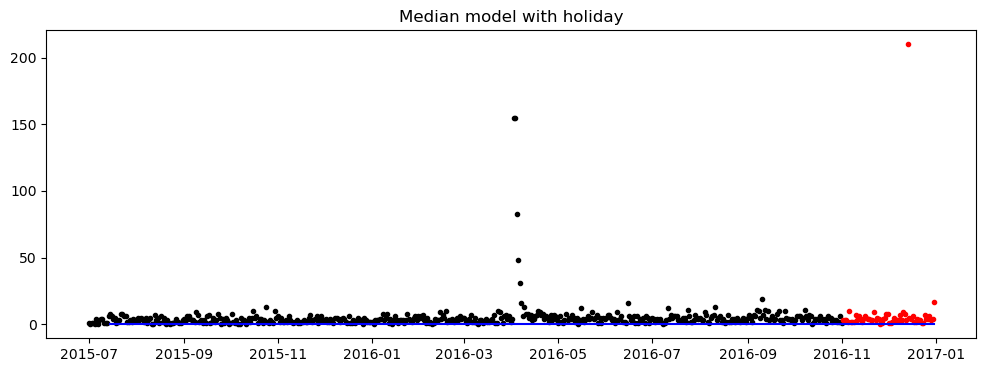

The SMAPE score is : 1.96667


C:\Users\ayush\AppData\Local\Temp\ipykernel_3216\244012502.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  actual = actual.fillna(0)


In [29]:
# This is to demo the median model - weekday, weekend and 
print(train.iloc[[2]])

df_train = extract_series(X_train, 2, 5)
df_actual = extract_series(y_train, 2, 5)
lang = X_train.iloc[2, 1]
score = median_holiday_model(df_train.copy(), df_actual.copy(), 15, lang, review=True)
print("The SMAPE score is : %.5f" % score)

## D. ARIMA model

In [31]:
from statsmodels.tsa.arima_model import ARIMA   
import warnings

def arima_model(df_train, df_actual, p, d, q, figSize=(12, 4), review=False):
    df_train = df_train.fillna(0)
    train_series = df_train.y
    train_series.index = df_train.ds

    result = None
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        try:
            arima = ARIMA(train_series ,[p, d, q])
            result = arima.fit(disp=False)
        except Exception as e:
            print('\tARIMA failed', e)
                
    #print(result.params)
    start_idx = df_train.ds[d]
    # Check if result is not None before calling predict
    if result is not None:
        forecast_series = result.predict(start=start_idx, end=end_idx,typ='levels')
    else:
        # Handle the case where result is None (model fitting failed)
        forecast_series = pd.Series(np.nan, index=pd.date_range(start=start_idx, end=end_idx)) # or any other appropriate handling
    actual_series = df_actual.y
    actual_series.index = df_actual.ds

    if(review):
        plot_prediction_and_actual_2(train_series, forecast_series, actual_series, figSize=figSize, title='ARIMA model')
    
    return smape(forecast_series, actual_series)

## E. Facebook prophet library

In [33]:
def plot_prediction_and_actual(model, forecast, actual, xlim=None, ylim=None, figSize=None, title=None):
    fig, ax  = plt.subplots(1,1,figsize=figSize)
    ax.set_ylim(ylim)
    ax.plot(pd.to_datetime(actual.ds), actual.y, 'r.')
    model.plot(forecast, ax=ax);
    ax.set_title(title)
    plt.show()

In [34]:
# simple linear model
def normal_model(df_train, df_actual, review=False):
    start_date = df_actual.ds.min()
    end_date = df_actual.ds.max()
    
    actual_series = df_actual.y.copy()
    actual_series.index = df_actual.ds

    df_train['y'] = df_train['y'].astype('float')
    
    df_actual['y'] = df_actual['y'].astype('float')
    
    m = Prophet()
    m.fit(df_train)
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)
        
    if(review):
        ymin = min(df_actual.y.min(), df_train.y.min()) -100
        ymax = max(df_actual.y.max(), df_train.y.max()) +100
        #
        plot_prediction_and_actual(m, forecast, df_actual, ylim=[ymin, ymax], figSize=(12,4), title='Normal model')
    
    mask = (forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)
    forecast_series = forecast[mask].yhat
    forecast_series.index = forecast[mask].ds
    forecast_series[forecast_series < 0] = 0

    return smape(forecast_series, actual_series)

def holiday_model(df_train, df_actual, lang, review=False):
    start_date = df_actual.ds.min()
    end_date = df_actual.ds.max()
    
    actual_series = df_actual.y.copy()
    actual_series.index = df_actual.ds

    df_train['y'] = df_train['y'].astype('float')
    
    df_actual['y'] = df_actual['y'].astype('float')

    if(isinstance(lang, float) and math.isnan(lang)):
        holidays = None
    else:
        holidays = holidays_dict[lang]

    m = Prophet(holidays=holidays)
    m.fit(df_train)
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)
        
    if(review):
        ymin = min(df_actual.y.min(), df_train.y.min()) -100
        ymax = max(df_actual.y.max(), df_train.y.max()) +100
        plot_prediction_and_actual(m, forecast, df_actual, ylim=[ymin, ymax], figSize=(12,4), title='Holiday model')
    
    mask = (forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)
    forecast_series = forecast[mask].yhat
    forecast_series.index = forecast[mask].ds
    forecast_series[forecast_series < 0] = 0

    return smape(forecast_series, actual_series)

def yearly_model(df_train, df_actual, lang, review=False):
    start_date = df_actual.ds.min()
    end_date = df_actual.ds.max()
    
    actual_series = df_actual.y.copy()
    actual_series.index = df_actual.ds

    df_train['y'] = df_train['y'].astype('float')
    
    df_actual['y'] = df_actual['y'].astype('float')

    if(isinstance(lang, float) and math.isnan(lang)):
        holidays = None
    else:
        holidays = holidays_dict[lang]

    m = Prophet(holidays=holidays, yearly_seasonality=True)
    m.fit(df_train)
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)
        
    if(review):
        ymin = min(df_actual.y.min(), df_train.y.min()) -100
        ymax = max(df_actual.y.max(), df_train.y.max()) +100
        plot_prediction_and_actual(m, forecast, df_actual, ylim=[ymin, ymax], figSize=(12,4), title='Yealry model')
    
    mask = (forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)
    forecast_series = forecast[mask].yhat
    forecast_series.index = forecast[mask].ds
    forecast_series[forecast_series < 0] = 0

    return smape(forecast_series, actual_series)

In [35]:
# log model
def normal_model_log(df_train, df_actual, review=False):
    start_date = df_actual.ds.min()
    end_date = df_actual.ds.max()
    
    actual_series = df_actual.y.copy()
    actual_series.index = df_actual.ds

    df_train['y'] = df_train['y'].astype('float')
    df_train.y = np.log1p(df_train.y)
    
    df_actual['y'] = df_actual['y'].astype('float')
    df_actual.y = np.log1p(df_actual.y)
    
    m = Prophet()
    m.fit(df_train)
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)
    
    if(review):
        ymin = min(df_actual.y.min(), df_train.y.min()) -2
        ymax = max(df_actual.y.max(), df_train.y.max()) +2
        plot_prediction_and_actual(m, forecast, df_actual, ylim=[ymin, ymax], figSize=(12,4), title='Normal model in log')
        
    mask = (forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)
    forecast_series = np.expm1(forecast[mask].yhat)
    forecast_series.index = forecast[mask].ds
    forecast_series[forecast_series < 0] = 0

    return smape(forecast_series, actual_series)

def holiday_model_log(df_train, df_actual, lang, review=False):
    start_date = df_actual.ds.min()
    end_date = df_actual.ds.max()
    
    actual_series = df_actual.y.copy()
    actual_series.index = df_actual.ds

    df_train['y'] = df_train['y'].astype('float')
    df_train.y = np.log1p(df_train.y)
    
    df_actual['y'] = df_actual['y'].astype('float')
    df_actual.y = np.log1p(df_actual.y)

    if(isinstance(lang, float) and math.isnan(lang)):
        holidays = None
    else:
        holidays = holidays_dict[lang]
    m = Prophet(holidays=holidays)
    m.fit(df_train)
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)
    
    if(review):
        ymin = min(df_actual.y.min(), df_train.y.min()) -2
        ymax = max(df_actual.y.max(), df_train.y.max()) +2
        plot_prediction_and_actual(m, forecast, df_actual, ylim=[ymin, ymax], figSize=(12,4), title='Holiday model in log')
        
    mask = (forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)
    forecast_series = np.expm1(forecast[mask].yhat)
    forecast_series.index = forecast[mask].ds
    forecast_series[forecast_series < 0] = 0
    
    return smape(forecast_series, actual_series)

def yearly_model_log(df_train, df_actual, lang, review=False):
    start_date = df_actual.ds.min()
    end_date = df_actual.ds.max()
    
    actual_series = df_actual.y.copy()
    actual_series.index = df_actual.ds

    df_train['y'] = df_train['y'].astype('float')
    df_train.y = np.log1p(df_train.y)
    
    df_actual['y'] = df_actual['y'].astype('float')
    df_actual.y = np.log1p(df_actual.y)

    if(isinstance(lang, float) and math.isnan(lang)):
        holidays = None
    else:
        holidays = holidays_dict[lang]
        
    m = Prophet(holidays=holidays, yearly_seasonality=True)
    m.fit(df_train)
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)

    if(review):
        ymin = min(df_actual.y.min(), df_train.y.min()) -2
        ymax = max(df_actual.y.max(), df_train.y.max()) +2
        plot_prediction_and_actual(m, forecast, df_actual, ylim=[ymin, ymax], figSize=(12,4), title='Yearly model in log')
        
    mask = (forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)
    forecast_series = np.expm1(forecast[mask].yhat)
    forecast_series.index = forecast[mask].ds
    forecast_series[forecast_series < 0] = 0
    
    return smape(forecast_series, actual_series)

                                    Page  2015-07-01  2015-07-02  2015-07-03  \
2  3C_zh.wikipedia.org_all-access_spider         1.0         0.0         1.0   

   2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  2015-07-09  \
2         1.0         0.0         4.0         0.0         3.0         4.0   

   ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  2016-12-26  \
2  ...         3.0         1.0         1.0         7.0         4.0   

   2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
2         4.0         6.0         3.0         4.0        17.0  

[1 rows x 551 columns]


21:29:55 - cmdstanpy - INFO - Chain [1] start processing
21:31:04 - cmdstanpy - INFO - Chain [1] done processing


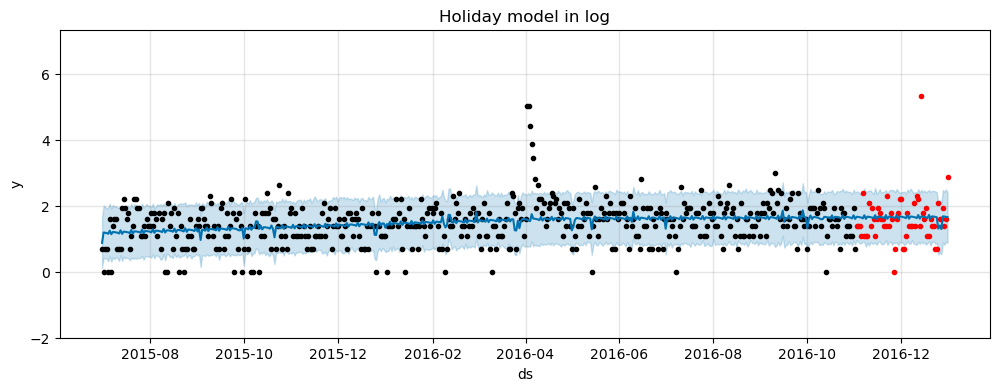

The SMAPE score is : 0.00000


C:\Users\ayush\AppData\Local\Temp\ipykernel_3216\244012502.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  actual = actual.fillna(0)


In [36]:
# This is to demo the facebook prophet model
print(train.iloc[[2]])

df_train = extract_series(X_train, 2, 5)
df_actual = extract_series(y_train, 2, 5)
lang = X_train.iloc[2, 1]
score = holiday_model_log(df_train.copy(), df_actual.copy(), lang, review=True)
print("The SMAPE score is : %.5f" % score)

## Selected model performance (validation score) over train dataset

In [38]:
import glob

def read_from_folder(path):
    filenames = glob.glob(path + "/*.csv")

    dfs = []
    for filename in filenames:
        dfs.append(pd.read_csv(filename, index_col=0))
    
    frame = pd.concat(dfs)
    return frame.sort_index()

In [39]:
# TODO: overall validation score in one number.
def validation_score(score_series):
    return score_series.mean()

In [40]:
valid_fn = "validation_score.csv"
valid_score_data = pd.read_csv(valid_fn, index_col=0)

print(valid_score_data[0:10])

    median7  median14  median21  median28  median35  median42  median49  \
0  0.394786  0.398010  0.405826  0.405826  0.405826  0.405826  0.405826   
1  0.415525  0.436615  0.484943  0.542946  0.484943  0.513212  0.503193   
2  0.688429  0.500956  0.500956  0.492091  0.492091  0.492091  0.492091   
3  0.356799  0.347737  0.356799  0.347737  0.356799  0.356799  0.356799   
4  0.443860  0.453087  0.442593  0.489076  0.586340  0.586340  0.586340   
5  0.356974  0.403169  0.434162  0.434162  0.434162  0.392296  0.356974   
6  0.717300  0.578713  0.558936  0.558936  0.597463  0.578713  0.634477   
7  0.541625  0.540358  0.541625  0.541625  0.541625  0.541625  0.547594   
8  0.383268  0.383268  0.396883  0.396883  0.396883  0.396883  0.396883   
9  0.294545  0.286787  0.279133  0.279133  0.279133  0.266971  0.257811   

   median7_h  median14_h  median21_h  median28_h  median35_h  median42_h  \
0   0.489267    0.415286    0.405018    0.403895    0.405018    0.405018   
1   0.442488    0.4320

### A. Simple median model

In [42]:
# Check which model is the best
print("Validation score for median model (7 days) is: %.6f" % validation_score(valid_score_data['median7']))
print("Validation score for median model (14 days) is: %.6f" % validation_score(valid_score_data['median14']))
print("Validation score for median model (21 days) is: %.6f" % validation_score(valid_score_data['median21']))
print("Validation score for median model (28 days) is: %.6f" % validation_score(valid_score_data['median28']))
print("Validation score for median model (35 days) is: %.6f" % validation_score(valid_score_data['median35']))
print("Validation score for median model (42 days) is: %.6f" % validation_score(valid_score_data['median42']))
print("Validation score for median model (49 days) is: %.6f" % validation_score(valid_score_data['median49']))

fig, axs  = plt.subplots(4,2,figsize=(12,12))
valid_score_data['median7'].plot.hist(bins=40, ax=axs[0][0])
valid_score_data['median14'].plot.hist(bins=40, ax=axs[0][1])
valid_score_data['median21'].plot.hist(bins=40, ax=axs[1][0])
valid_score_data['median28'].plot.hist(bins=40, ax=axs[1][1])
valid_score_data['median35'].plot.hist(bins=40, ax=axs[2][0])
valid_score_data['median42'].plot.hist(bins=40, ax=axs[2][1])
valid_score_data['median49'].plot.hist(bins=40, ax=axs[3][0])

Validation score for median model (7 days) is: 0.473336
Validation score for median model (14 days) is: 0.466893
Validation score for median model (21 days) is: 0.465923
Validation score for median model (28 days) is: 0.468887
Validation score for median model (35 days) is: 0.471014
Validation score for median model (42 days) is: 0.474268
Validation score for median model (49 days) is: 0.478236


<Axes: ylabel='Frequency'>

### B. Median model - weekday, weekend, holiday

In [44]:
print("Validation score for median model w/holiday (7 days) is: %.6f" % validation_score(valid_score_data['median7_h']))
print("Validation score for median model w/holiday (14 days) is: %.6f" % validation_score(valid_score_data['median14_h']))
print("Validation score for median model w/holiday (21 days) is: %.6f" % validation_score(valid_score_data['median21_h']))
print("Validation score for median model w/holiday (28 days) is: %.6f" % validation_score(valid_score_data['median28_h']))
print("Validation score for median model w/holiday (35 days) is: %.6f" % validation_score(valid_score_data['median35_h']))
print("Validation score for median model w/holiday (42 days) is: %.6f" % validation_score(valid_score_data['median42_h']))
print("Validation score for median model w/holiday (49 days) is: %.6f" % validation_score(valid_score_data['median49_h']))

fig, axs  = plt.subplots(4,2,figsize=(12,12))
valid_score_data['median7_h'].plot.hist(bins=40, ax=axs[0][0])
valid_score_data['median14_h'].plot.hist(bins=40, ax=axs[0][1])
valid_score_data['median21_h'].plot.hist(bins=40, ax=axs[1][0])
valid_score_data['median28_h'].plot.hist(bins=40, ax=axs[1][1])
valid_score_data['median35_h'].plot.hist(bins=40, ax=axs[2][0])
valid_score_data['median42_h'].plot.hist(bins=40, ax=axs[2][1])
valid_score_data['median49_h'].plot.hist(bins=40, ax=axs[3][0])

Validation score for median model w/holiday (7 days) is: 0.477812
Validation score for median model w/holiday (14 days) is: 0.466311
Validation score for median model w/holiday (21 days) is: 0.462821
Validation score for median model w/holiday (28 days) is: 0.464308
Validation score for median model w/holiday (35 days) is: 0.465601
Validation score for median model w/holiday (42 days) is: 0.468109
Validation score for median model w/holiday (49 days) is: 0.471861


<Axes: ylabel='Frequency'>

### C. Facebook model

In [46]:
print("Validation score for holiday model is: %.6f" % validation_score(valid_score_data['holiday']))
print("Validation score for holiday model w/log is: %.6f" % validation_score(valid_score_data['holiday_log']))
print("Validation score for yearly model w/log is: %.6f" % validation_score(valid_score_data['yearly_log']))

fig, axs  = plt.subplots(3,1,figsize=(12,12))
valid_score_data['holiday'].plot.hist(bins=40, ax=axs[0])
axs[0].set_title("Holiday model")
valid_score_data['holiday_log'].plot.hist(bins=40, ax=axs[1])
axs[1].set_title("Holiday model w/log")
valid_score_data['yearly_log'].plot.hist(bins=40, ax=axs[2])
axs[2].set_title("Yearly model w/log")

Validation score for holiday model is: 0.919387
Validation score for holiday model w/log is: 0.586509
Validation score for yearly model w/log is: 0.612651


Text(0.5, 1.0, 'Yearly model w/log')

### D. mixed model

In [48]:
def model_to_use( median, holiday_log, yearly_log):
    result = median
    if(median * 1 > yearly_log):
        result = yearly_log
    elif(median * 1 > holiday_log):
        result = holiday_log
        
    return result

model_score = valid_score_data.apply(lambda x: model_to_use( x['median14'], x['holiday_log'], x['yearly_log']), axis=1)

print("Validation score for a proposed model is: %.6f" % validation_score(model_score))
model_score.plot.hist(bins=40)

Validation score for a proposed model is: 0.406967


<Axes: title={'center': 'Yearly model w/log'}, ylabel='Frequency'>

In [49]:
model_score_2 = valid_score_data.min(axis=1)
print("Best possible Validation score for a mixed model is: %.6f" % validation_score(model_score_2))

model_score_2.plot.hist(bins=40)

Best possible Validation score for a mixed model is: 0.373013


<Axes: title={'center': 'Yearly model w/log'}, ylabel='Frequency'>